In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

In [2]:
training_data = pd.read_csv('../Data/train.csv')
test_data = pd.read_csv('../Data/test.csv')
transacciones = pd.read_csv('../Data/transactions.csv')
oil = pd.read_csv('../Data/oil.csv')
eventos = pd.read_csv('../Data/holidays_events.csv')
tiendas = pd.read_csv('../Data/stores.csv')

## Data Analysis

### Training Data

In [3]:
training_data.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [4]:
row, columns = training_data.shape
print(f"Total number of rows: {row}")
print(f"Total number of columns: {columns}")

Total number of rows: 3000888
Total number of columns: 6


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
training_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
training_data['id'].nunique()

3000888

#### Date

In [8]:
training_data["date"] = pd.to_datetime(training_data["date"])

In [9]:
group_date = training_data["date"].value_counts()
group_date.sort_index().head(5)

2013-01-01    1782
2013-01-02    1782
2013-01-03    1782
2013-01-04    1782
2013-01-05    1782
Name: date, dtype: int64

In [10]:
# Checking if all dates have the same amount of values
group_date[group_date != 1782].shape

(0,)

#### Store nbr

In [11]:
training_data["store_nbr"].nunique()

54

In [12]:
training_data["store_nbr"].value_counts().head(5)

1     55572
46    55572
36    55572
37    55572
38    55572
Name: store_nbr, dtype: int64

In [13]:
# Checking if all stores have the same amount of values
group_store = training_data["store_nbr"].value_counts()
group_store[group_store != 55572].shape

(0,)

#### Family

In [14]:
training_data["family"].value_counts().head(5)

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
Name: family, dtype: int64

In [15]:
# Checking if all families have the same amount of values
group_family = training_data["family"].value_counts()
group_family[group_family != 90936].shape

(0,)

#### Sales

In [16]:
training_data["sales"].describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

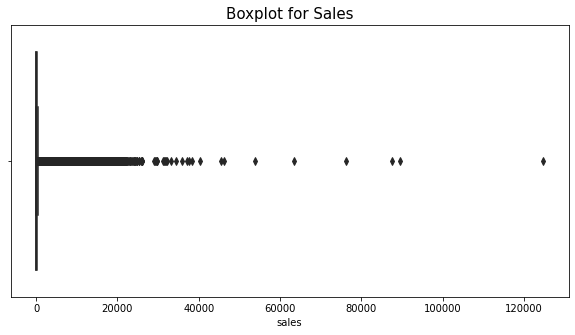

In [17]:
plt.figure(figsize=(10, 5))
plt.title("Boxplot for Sales", size=15)
plt.xlabel("Sales")
sns.boxplot(x=training_data["sales"], color="green");

In [26]:
group_date_sales = training_data.groupby("date").sum()
group_stores_sales = training_data.groupby("store_nbr").sum().sort_values(by="sales", ascending=False)
group_families_sales = training_data.groupby("family").sum()

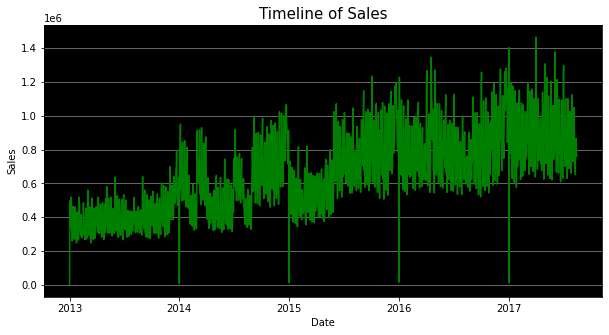

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.lineplot(x=group_date_sales.index, y=group_date_sales["sales"], color="green", ax=ax)
ax.set_facecolor('black')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.set_title("Timeline of Sales", size=15)
ax.set_xlabel("Date")
ax.set_ylabel("Sales");

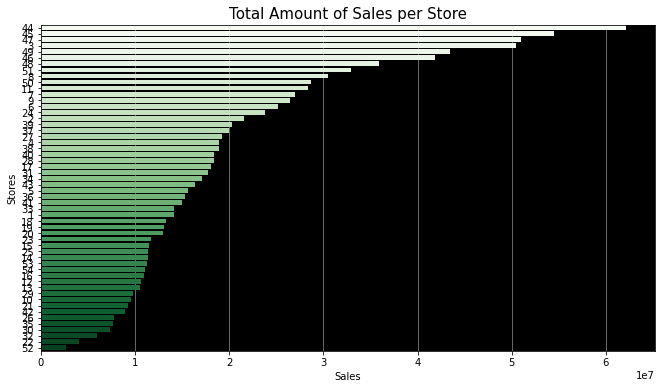

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))
sns.barplot(y=group_stores_sales.index.astype(str), x=group_stores_sales["sales"], palette="Greens", ax=ax)
ax.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')
ax.set_title("Total Amount of Sales per Store", size=15)
ax.set_xlabel("Sales")
ax.set_ylabel("Stores");